In [1]:
# Проверим нашу рабочую директорию
import os

dirpath = os.getcwd()
print("current directory is : " + dirpath)
foldername = os.path.basename(dirpath)
print("Directory name is : " + foldername)

current directory is : /home/tim
Directory name is : tim


In [2]:
# При необходимости, поменяем на новую рабочую директорию.
os.chdir('/home/tim/02_ML')

In [3]:
# Загрузим txt файл с помощью Pandas. В файле всего две колонки без заголовка. Присвоим колонкам имена 'Population' и 'Profit'. 
import pandas as pd

path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [4]:
# общую информацию по датафрейму и всем признакам
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB
None


In [5]:
# Посмотрим на первые 6 строк (включая заголовок)
print(data.head())

   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


In [6]:
# получим сводную информацию по всей таблице 
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


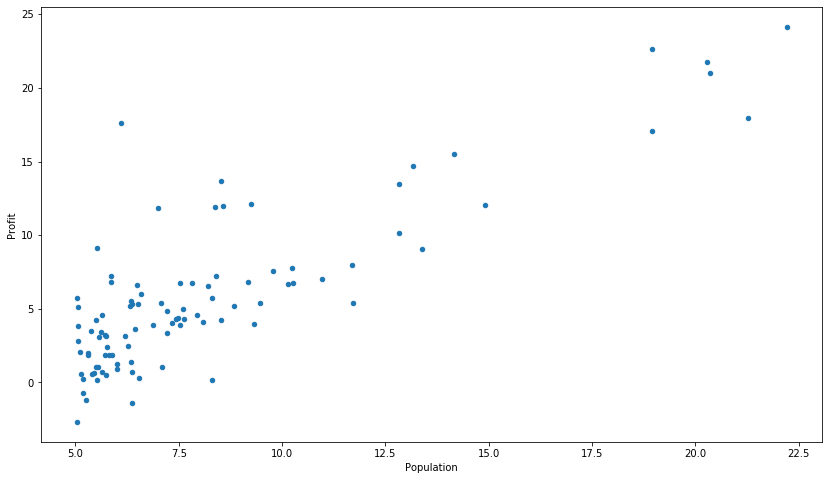

In [7]:
# Визуализация данных  - вариант 1 
import matplotlib.pyplot as plt  
%matplotlib inline

data.plot(kind='scatter', x='Population', y='Profit', figsize=(14,8))

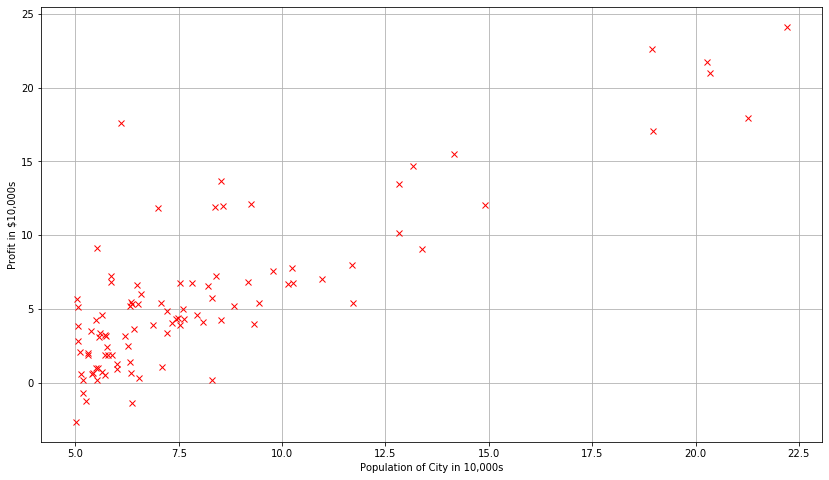

In [8]:
# Визуализация данных - вариант 2
plt.figure(figsize=(14, 8))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid()
plt.plot(data.Population, data.Profit, 'rx')

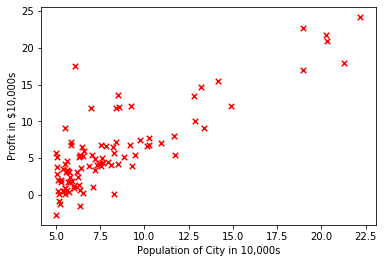

In [9]:
# Визуализация данных - вариант 3
# Scatter - график разброса 
plt.scatter(data.iloc[:,0:(data.shape[1]-1)], data.iloc[:,(data.shape[1]-1):data.shape[1]], s=30, c='r', marker='x', linewidths=1)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

# Cost function 
$J(\theta)=\frac{1}{2m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$, где $h_{\theta}(x)=\theta^{T} x=\theta_0+\theta_1x_1$


добавим фиктивную размерность $x_0 = 1$ для каждого наблюдения, чтобы решать линейную модель в векторном виде 

In [10]:
data.insert(0, 'Ones', 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [11]:
# пусть Х - датафрейм наблюдений и признаков (включая фиктивную единичную колонку слева);
# пусть y - объясняемая (или целевая) переменная;
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
print(X.head())
print(y.head())

   Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598
    Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233


In [12]:
# преобразование Х и y (датафреймов) в матрицы;
import numpy as np
X = np.matrix(X.values)
y = np.matrix(y.values)
X.shape, y.shape

((97, 2), (97, 1))

In [13]:
# в задаче первоначальный параметр для theta_0 и theta_1 равен нулю;
theta = np.matrix(np.array([0,0]))
theta, theta.shape

(matrix([[0, 0]]), (1, 2))

In [14]:
# функция потерь (cost function)
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [15]:
# ответ на первое задание
computeCost(X, y, theta)

32.072733877455676

# Gradient Descent
$\theta_j:=\theta_j-\alpha\frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} \\
\begin{align}
\theta_0 & := \theta_0 - \alpha\frac{\partial}{\partial\theta_0} J(\theta_0,\theta_1) \\
\theta_1 & := \theta_1 - \alpha\frac{\partial}{\partial\theta_1} J(\theta_0,\theta_1)
\end{align}$

In [16]:
# в задании предложен шаг Градиентного спуска = 0.01; количество циклов = 1000
# alpha = 0.01
alpha = .01
iters = 1000


In [17]:
# функция Градиентного спуска
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape)) # начальные нулевые значения
    parameters = int(theta.ravel().shape[1])# количество колонок у theta. В данном примере их всего две.
    cost = np.zeros(iters)
 
    thetahistory = theta #Used for three d plot of convergence
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        
        cost[i] = computeCost(X, y, theta) # сохраняет значение Cost function для каждого цикла
        thetahistory = np.append(thetahistory, temp, axis=0)
     
    
    # удалим из thetahistory перую строку с нулями, чтобы размер thetahistory=cost=iters
    thetahistory=thetahistory[1:][:]
    
    return theta, cost, thetahistory


###  g - итоговые параметры для $\theta_0$ и $\theta_1$.
___[Получаем две переменных из функции gradientDescent](https://stackoverflow.com/questions/20389533/what-does-x-y-mean-in-python-syntax)___.

___[Unpacking a Tuple in Python](https://www.geeksforgeeks.org/unpacking-a-tuple-in-python)___



In [18]:
g, cost, thetahistory = gradientDescent(X, y, theta, alpha, iters)


In [19]:
g

matrix([[-3.24140214,  1.1272942 ]])

In [20]:
computeCost(X, y, g)

4.515955503078912

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

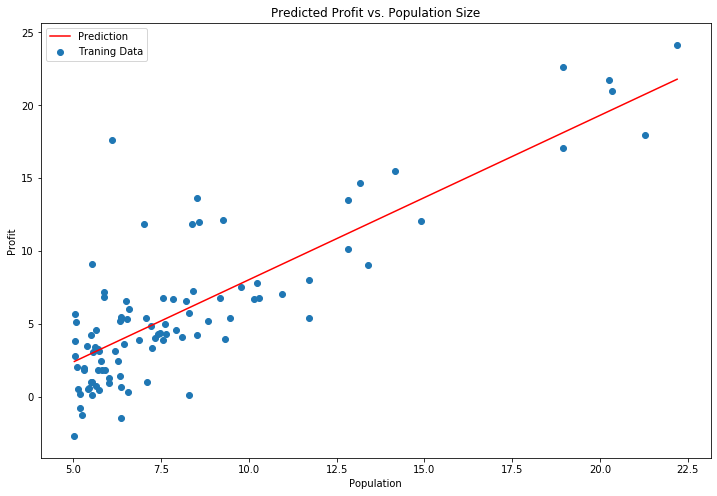

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')



In [22]:
# Преобразуем матрицу "g" в список "theta_f" 
theta_f = list(g.flat)
print("матрица theta: ", theta, ". Класс: ", type(theta))
print("матрица g: ", g, ". Класс: ", type(g))
print("список theta_f: ", theta_f, ". Класс: ", type(theta_f))
x = np.linspace(data.Population.min(), data.Population.max(), 100)
xs = np.arange(5, 23)
print("---------------")
print("Класс: ", type(x), x)
print("---------------")
print("Класс: ", type(xs), xs)

матрица theta:  [[0 0]] . Класс:  <class 'numpy.matrix'>
матрица g:  [[-3.24140214  1.1272942 ]] . Класс:  <class 'numpy.matrix'>
список theta_f:  [-3.2414021442744216, 1.1272942024281842] . Класс:  <class 'list'>
---------------
Класс:  <class 'numpy.ndarray'> [ 5.0269      5.20039596  5.37389192  5.54738788  5.72088384  5.8943798
  6.06787576  6.24137172  6.41486768  6.58836364  6.7618596   6.93535556
  7.10885152  7.28234747  7.45584343  7.62933939  7.80283535  7.97633131
  8.14982727  8.32332323  8.49681919  8.67031515  8.84381111  9.01730707
  9.19080303  9.36429899  9.53779495  9.71129091  9.88478687 10.05828283
 10.23177879 10.40527475 10.57877071 10.75226667 10.92576263 11.09925859
 11.27275455 11.44625051 11.61974646 11.79324242 11.96673838 12.14023434
 12.3137303  12.48722626 12.66072222 12.83421818 13.00771414 13.1812101
 13.35470606 13.52820202 13.70169798 13.87519394 14.0486899  14.22218586
 14.39568182 14.56917778 14.74267374 14.9161697  15.08966566 15.26316162
 15.436657

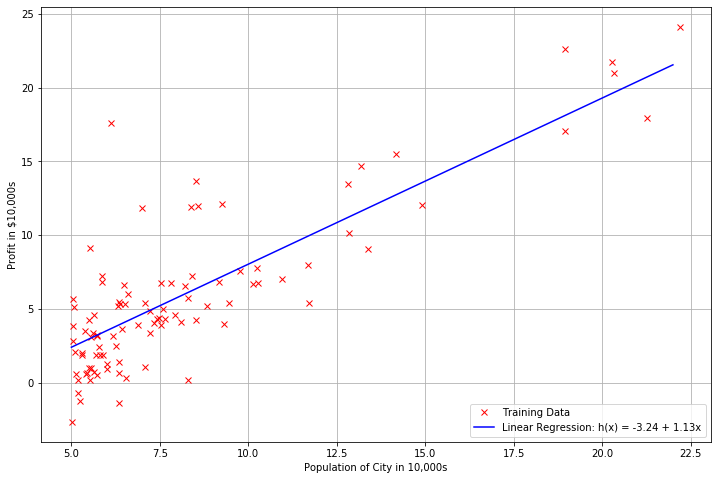

In [23]:
theta_f = list(g.flat)
# Функция arange() возвращает одномерный массив с равномерно разнесенными значениями внутри заданного интервала. 
xs = np.arange(5, 23)
ys = theta_f[0] + theta_f[1] * xs

plt.figure(figsize=(12, 8))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
# Добавление сетки графика и параметров сетки.
plt.grid()
plt.plot(data.Population, data.Profit, 'rx', label='Training Data')
plt.plot(xs, ys, 'b-', label='Linear Regression: h(x) = %0.2f + %0.2fx'%(theta_f[0], theta_f[1]))
# The location of the legend. Расположение легенды. Место соответствует номеру. "4" означает "lower right". 
plt.legend(loc=4)

In [24]:
# Grid to calculate cost values
theta0_vals = np.linspace(-10, 10, 80)
theta1_vals = np.linspace(-1, 4, 80)

# initialize J_vals to a matrix of 0's:
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals:
for i in np.arange(theta0_vals.size):
    for j in np.arange(theta1_vals.size):
        t = np.matrix([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = computeCost(X, y, t)


In [25]:
J_vals.shape

(80, 80)

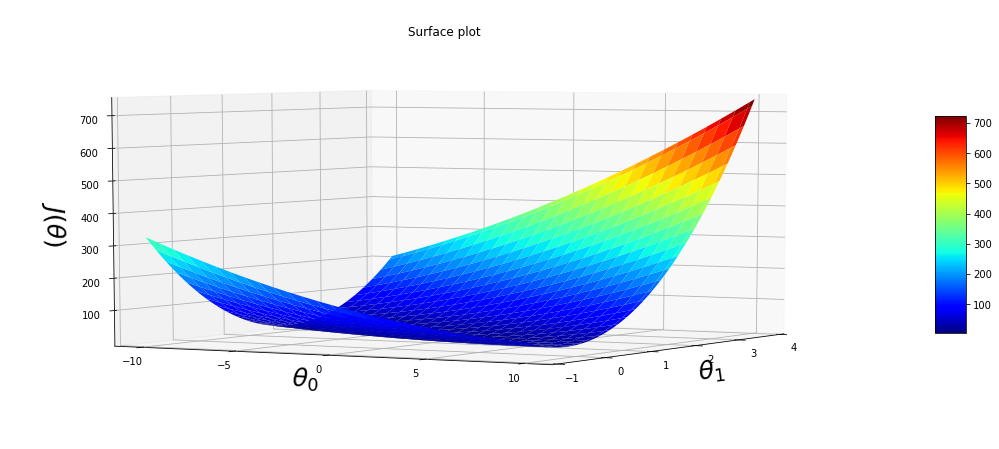

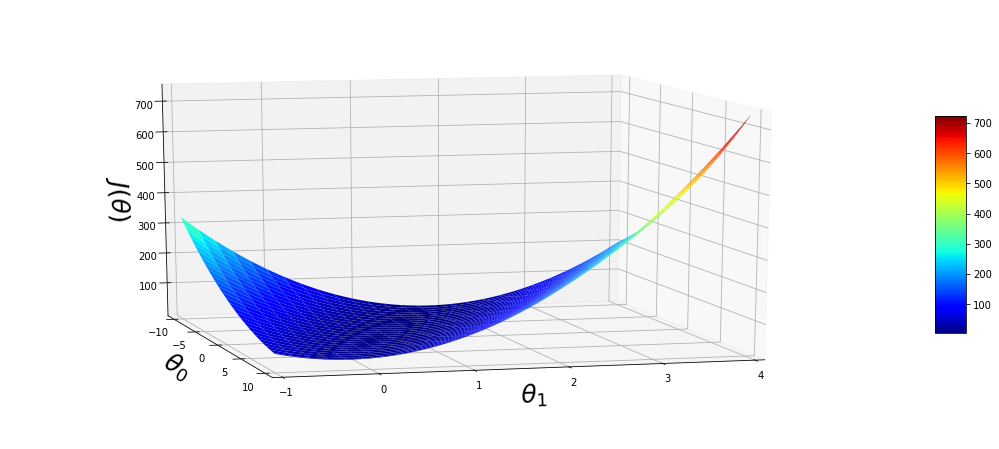

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(45, 8))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121, projection='3d')

theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)
surf = ax1.plot_surface(theta1, theta0, J_vals.T, cmap='jet', rstride=3, cstride=3, antialiased=True)

fig.colorbar(surf, shrink=0.5, aspect=7)

# Surface plot:
ax1.set_title('Surface plot')

ax1.view_init(elev=5, azim=30)
ax1.set_xlabel(r'$\theta_1$', labelpad=8,fontsize=25)
ax1.set_xlim(4,-1,.1)
ax1.set_ylabel(r'$\theta_0$', labelpad=8,fontsize=25)
ax1.set_yticks(np.linspace(-10, 10, 5))
ax1.set_zlabel(r'$J(\theta)$', labelpad=8,fontsize=25);


fig2 = plt.figure(figsize=(45, 8))
fig2.subplots_adjust(wspace=0.3)
ax2 = fig2.add_subplot(122, projection='3d')

ax2.plot_surface(theta1, theta0, J_vals.T, cmap='jet', rstride=3, cstride=3, antialiased=True)
ax2.view_init(elev=12, azim=75)

ax2.set_xlabel(r'$\theta_1$', labelpad=8,fontsize=25)
ax2.set_xlim(4,-1,.1)
ax2.set_ylabel(r'$\theta_0$', labelpad=8,fontsize=25)
ax2.set_yticks(np.linspace(-10, 10, 5))
ax2.set_zlabel(r'$J(\theta)$', labelpad=8,fontsize=25)

fig2.colorbar(surf, shrink=0.5, aspect=7)

Text(0.5, 1.0, 'Error vs. Training Epoch')

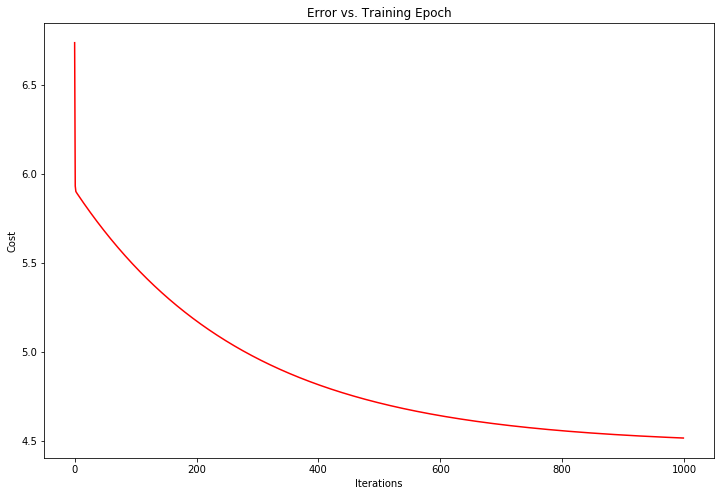

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

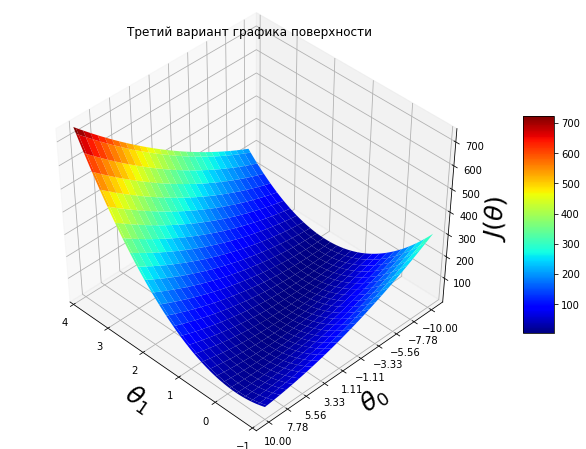

In [28]:
#Import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
#from matplotlib import cm
#import itertools

fig = plt.figure(figsize=(25, 8))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121, projection='3d')
fig.colorbar(surf, shrink=0.5, aspect=7)

theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)

# Surface plot:
ax1.set_title('Третий вариант графика поверхности')
surf = ax1.plot_surface(theta1, theta0, J_vals.T, cmap='jet', rstride=3, cstride=3, antialiased=True)
ax1.view_init(elev=45, azim=135)


ax1.set_xlabel(r'$\theta_1$', labelpad=8,fontsize=25)
ax1.set_xlim(-1,4, 10)
ax1.set_ylabel(r'$\theta_0$', labelpad=8,fontsize=25)
ax1.set_yticks(np.linspace(-10, 10, 10))
ax1.set_zlabel(r'$J(\theta)$', labelpad=8,fontsize=25);

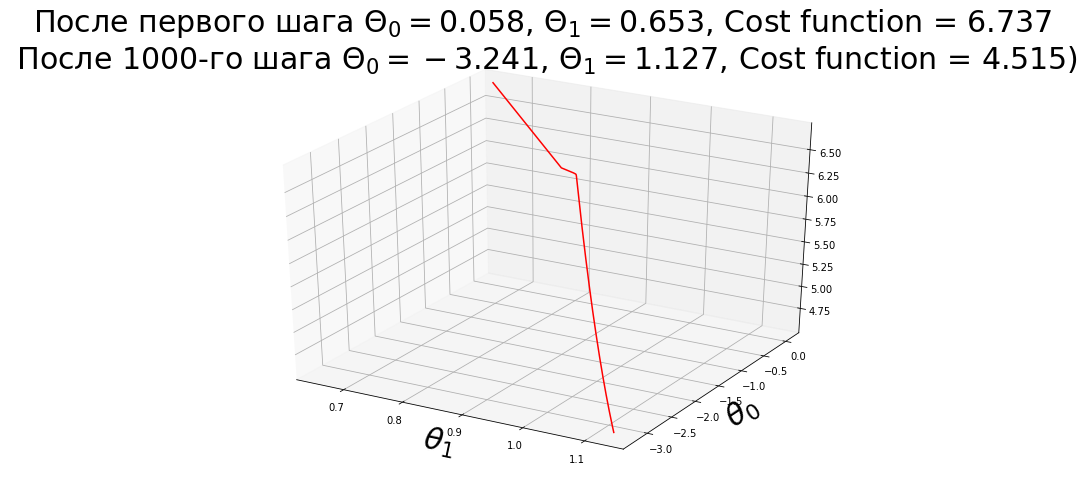

In [29]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')

plt.xlabel(r'$\theta_1$',fontsize=30)
plt.ylabel(r'$\theta_0$',fontsize=30)
plt.title('После первого шага $\Theta_0=0.058$, $\Theta_1=0.653$, Cost function = 6.737\n После 1000-го шага $\Theta_0=-3.241$, $\Theta_1=1.127$, Cost function = 4.515)',fontsize=30)

# Трансформируем матрицу в список
theta_hist_list=thetahistory.tolist()
# Трансформируем numpy.ndarray в список
cost2=cost.tolist()
plt.plot([x[1] for x in theta_hist_list],[x[0] for x in theta_hist_list],cost2,'r-')
plt.show()

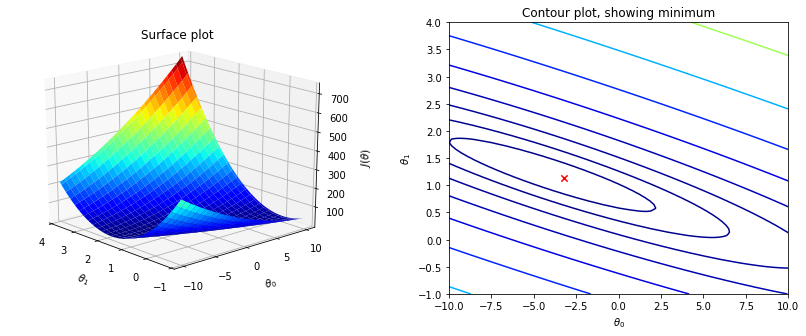

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)

# Surface plot:
ax1.set_title('Surface plot')
ax1.plot_surface(theta1, theta0, J_vals.T, cmap='jet', rstride=3, cstride=3, antialiased=True)
ax1.view_init(elev=20, azim=318)
ax1.set_xlabel(r'$\theta_1$', labelpad=8)
ax1.set_xlim(4,-1)
ax1.set_ylabel(r'$\theta_0$', labelpad=8)
ax1.set_yticks(np.linspace(-10, 10, 5))
ax1.set_zlabel(r'$J(\theta)$', labelpad=8);

# Contour plot:
ax2.set_title('Contour plot, showing minimum')
ax2.contour(theta0, theta1, J_vals.T, np.logspace(-2, 3, 20),  cmap='jet')
ax2.scatter(theta_f[0], theta_f[1], marker='x', color='r', s=40)
ax2.set_xlabel(r'$\theta_0$')
ax2.set_ylabel(r'$\theta_1$')
ax2.set_yticks(np.arange(-1,4.5,0.5));
